In [1]:
# FOR NUMERICAL ANALYTICS
import numpy as np
# TO STORE AND PROCESS DATA IN DATAFRAME
import pandas as pd
pd.options.mode.chained_assignment = None
import os
# BASIC VISUALIZATION PACKAGE
import matplotlib.pyplot as plt
# ADVANCED PLOTTING
import seaborn as seabornInstance
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
# INTERACTIVE VISUALIZATION
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# **1. DATA COLLECTING AND SAVING**

In [2]:
#2021 data
df_21 = pd.read_csv('../data/world-happiness-report-2021/world-happiness-report-2021.csv')
usecols = ['Country name','Ladder score','Logged GDP per capita','Social support',
                'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
df_21.drop(['Regional indicator','Standard error of ladder score', 'upperwhisker', 
                'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 
                    'Explained by: Social support', 'Explained by: Healthy life expectancy', 
                        'Explained by: Freedom to make life choices', 'Explained by: Generosity', 
                            'Explained by: Perceptions of corruption', 'Dystopia + residual'],axis=1,inplace=True) 
df_21.columns = ['Country name','Ladder score','Logged GDP per capita','Social support',
                'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
df_21['Year'] = 2021 #add year column
df_21.head()

Country name  Ladder score  Logged GDP per capita  Social support  \
0      Finland         7.842                 10.775           0.954   
1      Denmark         7.620                 10.933           0.954   
2  Switzerland         7.571                 11.117           0.942   
3      Iceland         7.554                 10.878           0.983   
4  Netherlands         7.464                 10.932           0.942   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     72.0                         0.949      -0.098   
1                     72.7                         0.946       0.030   
2                     74.4                         0.919       0.025   
3                     73.0                         0.955       0.160   
4                     72.4                         0.913       0.175   

   Perceptions of corruption  Year  
0                      0.186  2021  
1                      0.179  2021  
2                      0.292  2021  
3                      0.673  2021  
4                      0.338  2021

In [3]:
df = pd.read_csv('../data/world-happiness-report-2021/world-happiness-report.csv')

#change columnn names in df for pd.append to work properly
df.rename(columns = {'year' : 'Year', 'Log GDP per capita' : 'Logged GDP per capita', 
                         'Life Ladder' : 'Ladder score', 'Healthy life expectancy at birth' : 'Healthy life expectancy'}, inplace = True)
df.drop(['Positive affect', 'Negative affect'], axis = 1, inplace = True)

#filter 2018, 2019, and 2020 data
is_2018 = df['Year'] == 2018
is_2019 = df['Year'] == 2019
is_2020 = df['Year'] == 2020
df_18 = df[is_2018]
df_19 = df[is_2019]
df_20 = df[is_2020]
df_18['Rank'] = df_18['Ladder score'].rank(ascending = 0)
df_19['Rank'] = df_19['Ladder score'].rank(ascending = 0)
df_20['Rank'] = df_20['Ladder score'].rank(ascending = 0)
df_21['Rank'] = df_21['Ladder score'].rank(ascending = 0)

In [4]:
#appending data into two datasets
preCov = df_18.append([df_19])
Cov = df_20.append([df_21])
df = preCov.append([Cov])

In [5]:
#Data frame with essential metrics
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })

# **2. DATA ANALYSING**

In [6]:
#DATA CLEANSING
df.isnull().any()

#fill NaN with their means
df.fillna(df.mean(), inplace = True)
df.describe()

Year  Ladder score  Logged GDP per capita  Social support  \
count   530.000000    530.000000             530.000000      530.000000   
mean   2019.473585      5.589389               9.492491        0.818991   
std       1.161879      1.074438               1.105171        0.114190   
min    2018.000000      2.375000               6.635000        0.420000   
25%    2018.000000      4.884500               8.602000        0.755500   
50%    2019.000000      5.572000               9.569000        0.842500   
75%    2021.000000      6.309750              10.430750        0.910000   
max    2021.000000      7.889000              11.648000        0.984000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               530.000000                    530.000000  530.000000   
mean                 65.253423                      0.795017   -0.017304   
std                   6.542275                      0.112672    0.148719   
min                  48.200000                      0.374000   -0.335000   
25%                  60.595500                      0.722000   -0.121750   
50%                  66.700000                      0.811000   -0.034000   
75%                  69.688000                      0.884000    0.068500   
max                  77.100000                      0.970000    0.561000   

       Perceptions of corruption        Rank  
count                 530.000000  530.000000  
mean                    0.724356   68.543396  
std                     0.181794   40.885785  
min                     0.070000    1.000000  
25%                     0.677250   34.000000  
50%                     0.776000   67.000000  
75%                     0.846000  101.000000  
max                     0.963000  149.000000

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Ladder score')

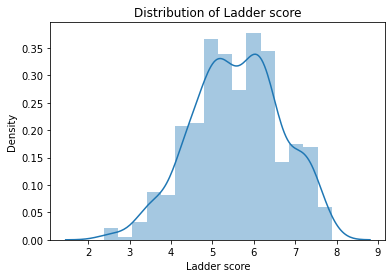

In [7]:
seabornInstance.distplot(df['Ladder score'])
plt.title('Distribution of Ladder score', fontsize=12)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Ladder score before COVID')

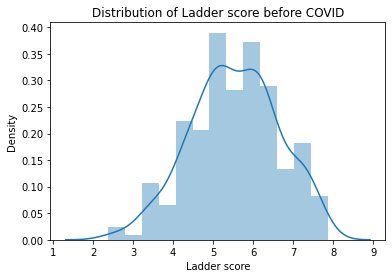

In [8]:
seabornInstance.distplot(preCov['Ladder score'])
plt.title('Distribution of Ladder score before COVID', fontsize=12)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Ladder score in COVID')

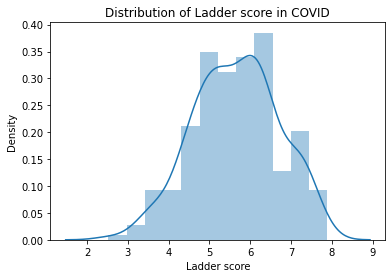

In [9]:
seabornInstance.distplot(Cov['Ladder score'])
plt.title('Distribution of Ladder score in COVID', fontsize=12)

Relationship between different features with Ladder score

1. GDP per capita

In [10]:
px.scatter(df, x="Logged GDP per capita", y="Ladder score", animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", hover_name="Country name",
           trendline= "ols")
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Logged GDP per capita'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Ladder score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['Logged GDP per capita'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Ladder score'], dtype = pd.Series)
pred = lr.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['Logged GDP per capita']],df['Ladder score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','Logged GDP per capita',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Score for Test Data: 5.445
Intercept: -1.3717464205986696
Coefficient: [0.73775598]


Model                Details  \
0  Simple Linear Regression  Logged GDP per capita   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                           0.752                 0.601   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
0                             -             0.569                        -   

   5-Fold Cross Validation  
0                    0.497

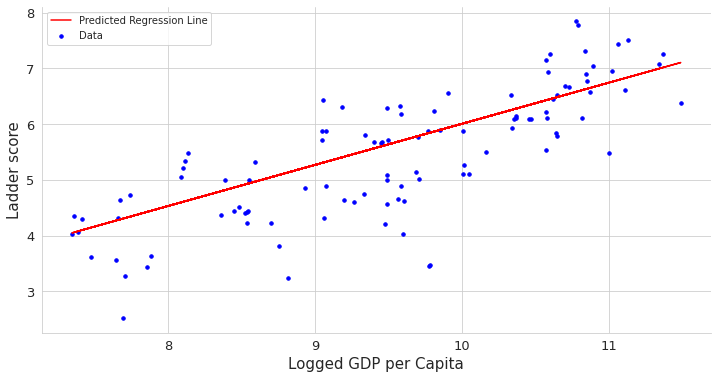

In [11]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Logged GDP per Capita", fontsize=15)
plt.ylabel("Ladder score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of GDP for all 4 years')

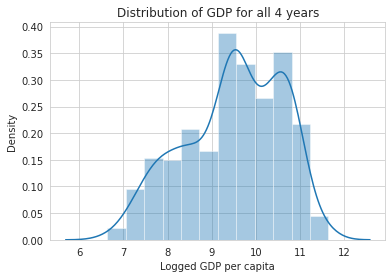

In [12]:
seabornInstance.distplot(df['Logged GDP per capita'])
plt.title('Distribution of GDP for all 4 years', fontsize=12)

In [13]:
'''Happiness score vs GDP'''
px.scatter(df, x="Logged GDP per capita", y="Ladder score", 
           animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", 
           hover_name="Country name",
           trendline= "ols")

2. Social support

In [14]:
px.scatter(df, x="Social support", y="Ladder score", animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", hover_name="Country name",
           trendline= "ols")
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Social support'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Ladder score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['Social support'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Ladder score'], dtype = pd.Series)
pred = lr.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['Social support']],df['Ladder score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','Social support',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Score for Test Data: 5.445
Intercept: -0.10694191745737669
Coefficient: [6.97781789]


Model                Details  \
0  Simple Linear Regression  Logged GDP per capita   
1  Simple Linear Regression         Social support   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                           0.752                 0.601   
1                           0.779                 0.552   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
0                             -             0.569                        -   
1                             -             0.537                        -   

   5-Fold Cross Validation  
0                    0.497  
1                    0.429

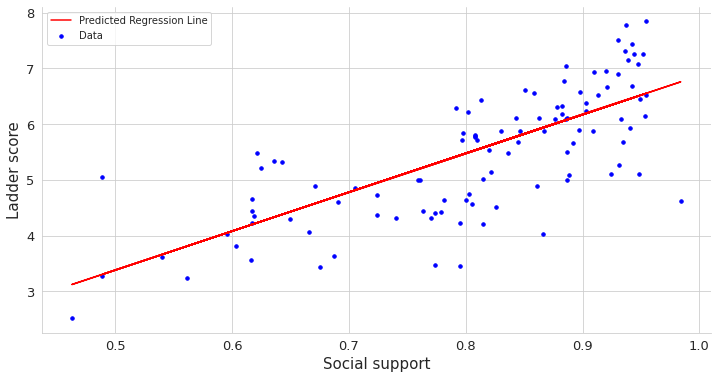

In [15]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Social support", fontsize=15)
plt.ylabel("Ladder score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Social support for all 4 years')

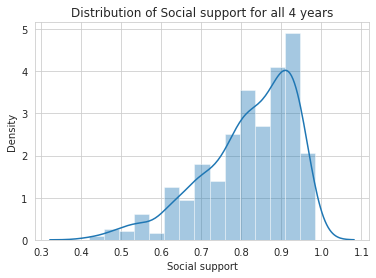

In [16]:
seabornInstance.distplot(df['Social support'])
plt.title('Distribution of Social support for all 4 years', fontsize=12)

In [17]:
'''Happiness score vs Social support'''
px.scatter(df, x="Social support", y="Ladder score", 
           animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", 
           hover_name="Country name",
           trendline= "ols")

3. Healthy life expectancy

In [18]:
px.scatter(df, x="Healthy life expectancy", y="Ladder score", animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", hover_name="Country name",
           trendline= "ols")
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Healthy life expectancy'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Ladder score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['Healthy life expectancy'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Ladder score'], dtype = pd.Series)
pred = lr.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['Healthy life expectancy']],df['Ladder score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','Healthy life expectancy',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Score for Test Data: 5.445
Intercept: -2.3500217561167913
Coefficient: [0.12232663]


Model                  Details  \
0  Simple Linear Regression    Logged GDP per capita   
1  Simple Linear Regression           Social support   
2  Simple Linear Regression  Healthy life expectancy   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                           0.752                 0.601   
1                           0.779                 0.552   
2                           0.795                 0.579   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
0                             -             0.569                        -   
1                             -             0.537                        -   
2                             -             0.518                        -   

   5-Fold Cross Validation  
0                    0.497  
1                    0.429  
2                    0.451

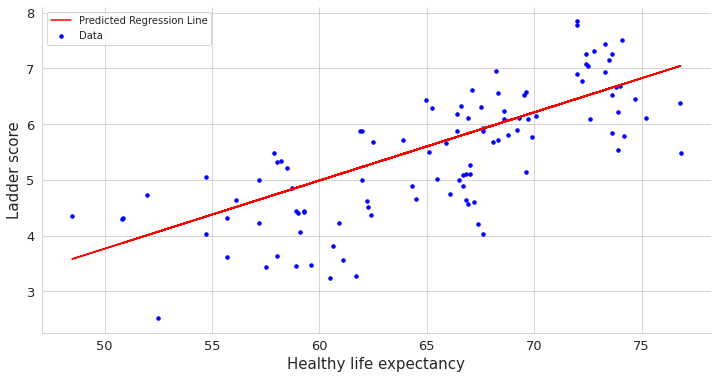

In [19]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Healthy life expectancy", fontsize=15)
plt.ylabel("Ladder score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Healthy life expectancy for all 4 years')

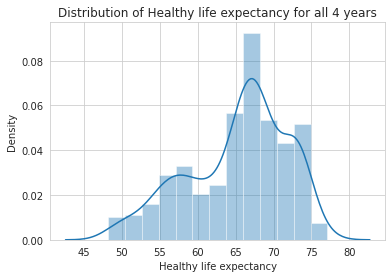

In [20]:
seabornInstance.distplot(df['Healthy life expectancy'])
plt.title('Distribution of Healthy life expectancy for all 4 years', fontsize=12)

In [21]:
'''Happiness score vs Healthy life expectancy'''
px.scatter(df, x="Healthy life expectancy", y="Ladder score", 
           animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", 
           hover_name="Country name",
           trendline= "ols")

4. Freedom to make life choices

In [22]:
px.scatter(df, x="Freedom to make life choices", y="Ladder score", animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", hover_name="Country name",
           trendline= "ols")
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Freedom to make life choices'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Ladder score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['Freedom to make life choices'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Ladder score'], dtype = pd.Series)
pred = lr.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['Freedom to make life choices']],df['Ladder score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','Freedom to make life choices',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Score for Test Data: 5.445
Intercept: 0.8981433794333338
Coefficient: [5.93277521]


Model                       Details  \
0  Simple Linear Regression         Logged GDP per capita   
1  Simple Linear Regression                Social support   
2  Simple Linear Regression       Healthy life expectancy   
3  Simple Linear Regression  Freedom to make life choices   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                           0.752                 0.601   
1                           0.779                 0.552   
2                           0.795                 0.579   
3                           1.091                 0.386   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
0                             -             0.569                        -   
1                             -             0.537                        -   
2                             -             0.518                        -   
3                             -             0.093                        -   

   5-Fold Cross Validation  
0                    0.497  
1                    0.429  
2                    0.451  
3                    0.140

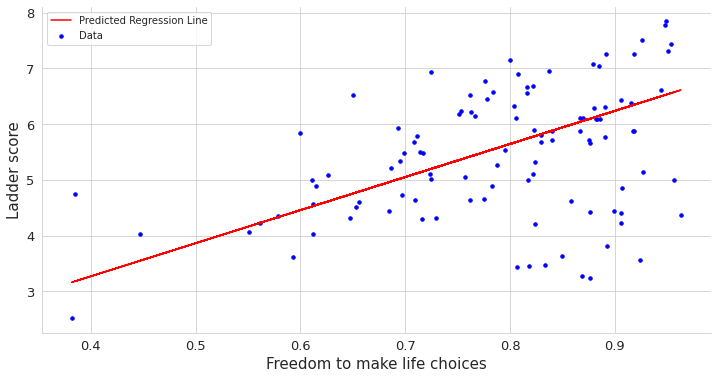

In [23]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Freedom to make life choices", fontsize=15)
plt.ylabel("Ladder score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Very scattered, and a weak linear relationship

5. Generosity

In [24]:
px.scatter(df, x="Generosity", y="Ladder score", animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", hover_name="Country name",
           trendline= "ols")
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Generosity'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Ladder score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['Generosity'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Ladder score'], dtype = pd.Series)
pred = lr.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['Generosity']],df['Ladder score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','Generosity',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Score for Test Data: 5.445
Intercept: 5.629634066388047
Coefficient: [0.24565609]


Model                       Details  \
0  Simple Linear Regression         Logged GDP per capita   
1  Simple Linear Regression                Social support   
2  Simple Linear Regression       Healthy life expectancy   
3  Simple Linear Regression  Freedom to make life choices   
4  Simple Linear Regression                    Generosity   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                           0.752                 0.601   
1                           0.779                 0.552   
2                           0.795                 0.579   
3                           1.091                 0.386   
4                           1.167                 0.001   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
0                             -             0.569                        -   
1                             -             0.537                        -   
2                             -             0.518                        -   
3                             -             0.093                        -   
4                             -            -0.037                        -   

   5-Fold Cross Validation  
0                    0.497  
1                    0.429  
2                    0.451  
3                    0.140  
4                   -0.296

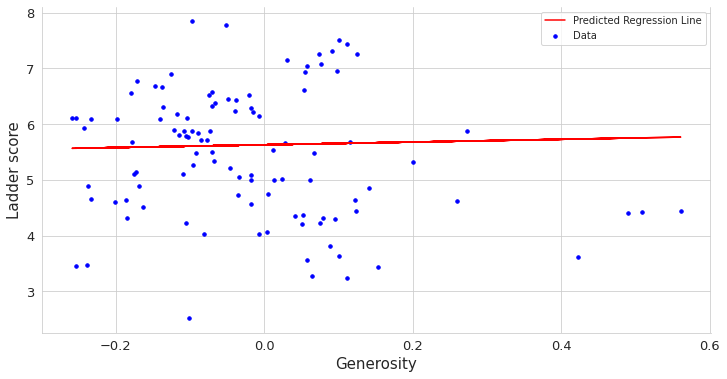

In [25]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Generosity", fontsize=15)
plt.ylabel("Ladder score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Surprise! Negative slope for generosity and very scattered also

6. Perceptions of corruption

In [26]:
px.scatter(df, x="Perceptions of corruption", y="Ladder score", animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", hover_name="Country name",
           trendline= "ols")
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Perceptions of corruption'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Ladder score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['Perceptions of corruption'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Ladder score'], dtype = pd.Series)
pred = lr.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['Perceptions of corruption']],df['Ladder score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','Perceptions of corruption',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Score for Test Data: 5.445
Intercept: 7.626381036050439
Coefficient: [-2.75672768]


Model                       Details  \
0  Simple Linear Regression         Logged GDP per capita   
1  Simple Linear Regression                Social support   
2  Simple Linear Regression       Healthy life expectancy   
3  Simple Linear Regression  Freedom to make life choices   
4  Simple Linear Regression                    Generosity   
5  Simple Linear Regression     Perceptions of corruption   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                           0.752                 0.601   
1                           0.779                 0.552   
2                           0.795                 0.579   
3                           1.091                 0.386   
4                           1.167                 0.001   
5                           1.114                 0.219   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
0                             -             0.569                        -   
1                             -             0.537                        -   
2                             -             0.518                        -   
3                             -             0.093                        -   
4                             -            -0.037                        -   
5                             -             0.055                        -   

   5-Fold Cross Validation  
0                    0.497  
1                    0.429  
2                    0.451  
3                    0.140  
4                   -0.296  
5                   -0.048

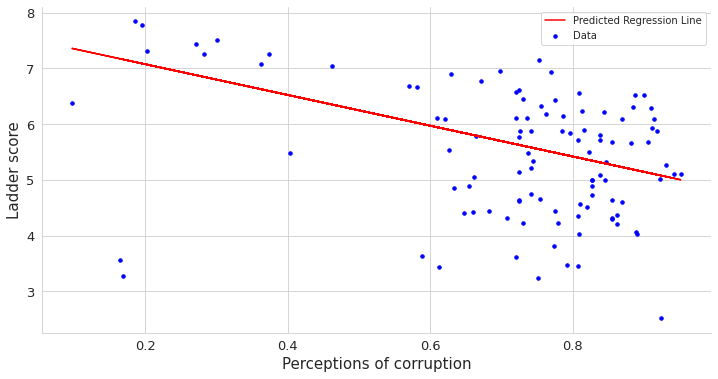

In [27]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Perceptions of corruption", fontsize=15)
plt.ylabel("Ladder score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

As expected with the negative slope, but a weak linear relationship => we have to look at the distribution of corruption

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of perceptions of corruption')

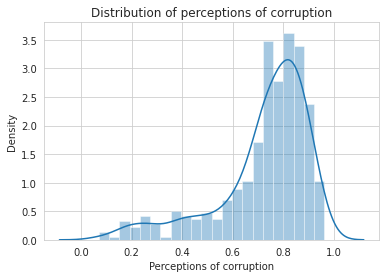

In [28]:
seabornInstance.distplot(df['Perceptions of corruption'])
plt.title('Distribution of perceptions of corruption', fontsize=12)

Corruption is negative skewed, which explains for the weak linear relationship.

In [29]:
'''Happiness score vs Corruption'''
px.scatter(df, x="Perceptions of corruption", y="Ladder score", 
           animation_frame="Year",
           animation_group="Country name",
           size="Rank", color="Country name", 
           hover_name="Country name",
           trendline= "ols")

Histogram of numeric data

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



[None, None, None, None, None, None]

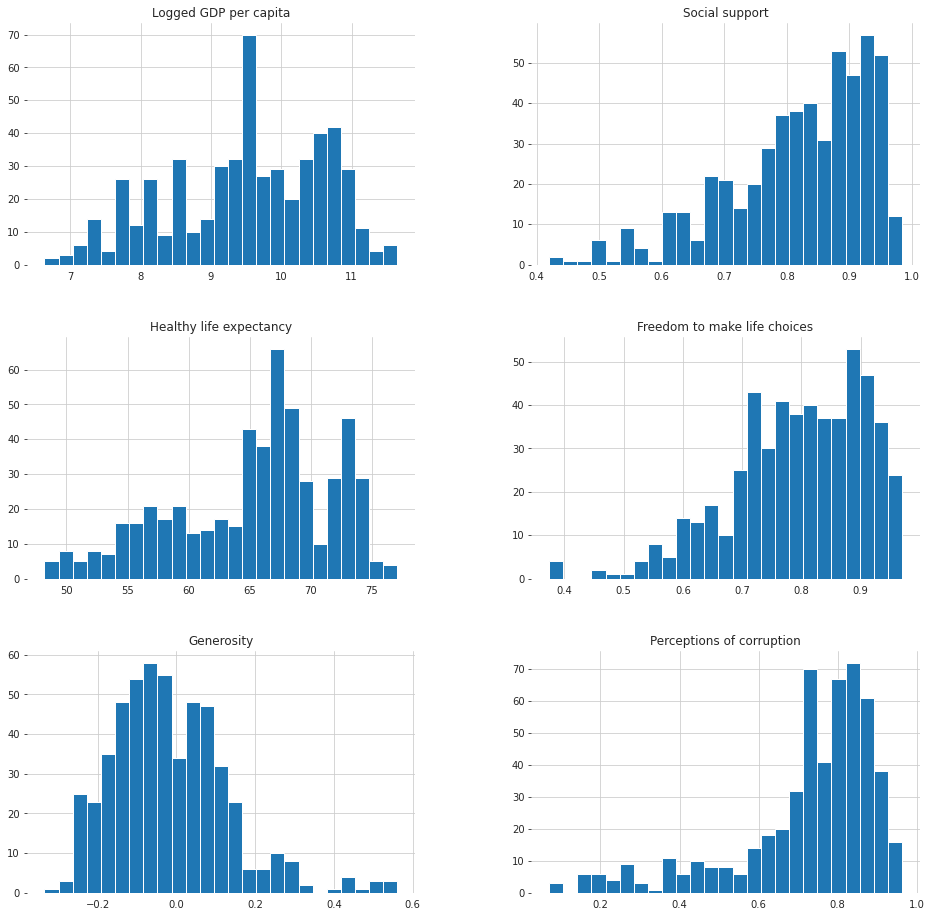

In [30]:
# DISTRIBUTION OF ALL NUMERIC DATA
plt.rcParams['figure.figsize'] = (15, 15)
df1 = df[['Logged GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices',
              'Generosity','Perceptions of corruption']]
h = df1.hist(bins = 25, figsize = (16,16),
             xlabelsize = '10', ylabelsize = '10')
seabornInstance.despine(left = True, bottom = True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()]

Geographic view of Happiness Rank

In [31]:
happiness_rank = dict(type = 'choropleth', 
           locations = df_21['Country name'],
           locationmode = 'country names',
           z = df_21['Rank'], 
           text = df_21['Country name'],
           colorscale = 'bluered',
           autocolorscale=False,
           reversescale=True,
           marker_line_color='darkgray',
           marker_line_width=0.5)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
world_map_1 = go.Figure(data = [happiness_rank], layout=layout)
iplot(world_map_1)

American countries tend to be happier than Asian and African countries

Top countries in each feature 

<AxesSubplot:xlabel='Ladder score', ylabel='Country name'>

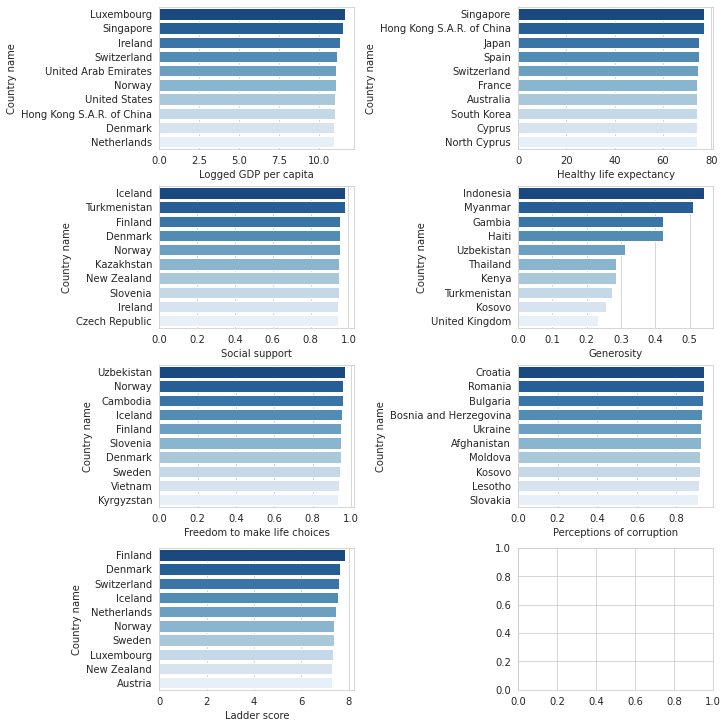

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=2,constrained_layout=True,figsize=(10,10))
seabornInstance.barplot(x='Logged GDP per capita',y='Country name',
                        data=df_21.nlargest(10,'Logged GDP per capita'),
                        ax=axes[0,0],palette="Blues_r")
seabornInstance.barplot(x='Healthy life expectancy' ,y='Country name',
                        data=df_21.nlargest(10,'Healthy life expectancy'),
                        ax=axes[0,1],palette='Blues_r')
seabornInstance.barplot(x='Social support' ,y='Country name',
                        data=df_21.nlargest(10,'Social support'),
                        ax=axes[1,0],palette='Blues_r')
seabornInstance.barplot(x='Generosity' ,y='Country name',
                        data=df_21.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
seabornInstance.barplot(x='Freedom to make life choices' ,y='Country name',
                        data=df_21.nlargest(10,'Freedom to make life choices'),
                        ax=axes[2,0],palette='Blues_r')
seabornInstance.barplot(x='Perceptions of corruption' ,y='Country name',
                        data=df_21.nlargest(10,'Perceptions of corruption'),
                        ax=axes[2,1],palette='Blues_r')
seabornInstance.barplot(x='Ladder score' ,y='Country name',
                        data=df_21.nlargest(10,'Ladder score'),
                        ax=axes[3,0],palette='Blues_r')

# **3. FEATURE ENGINEERING**

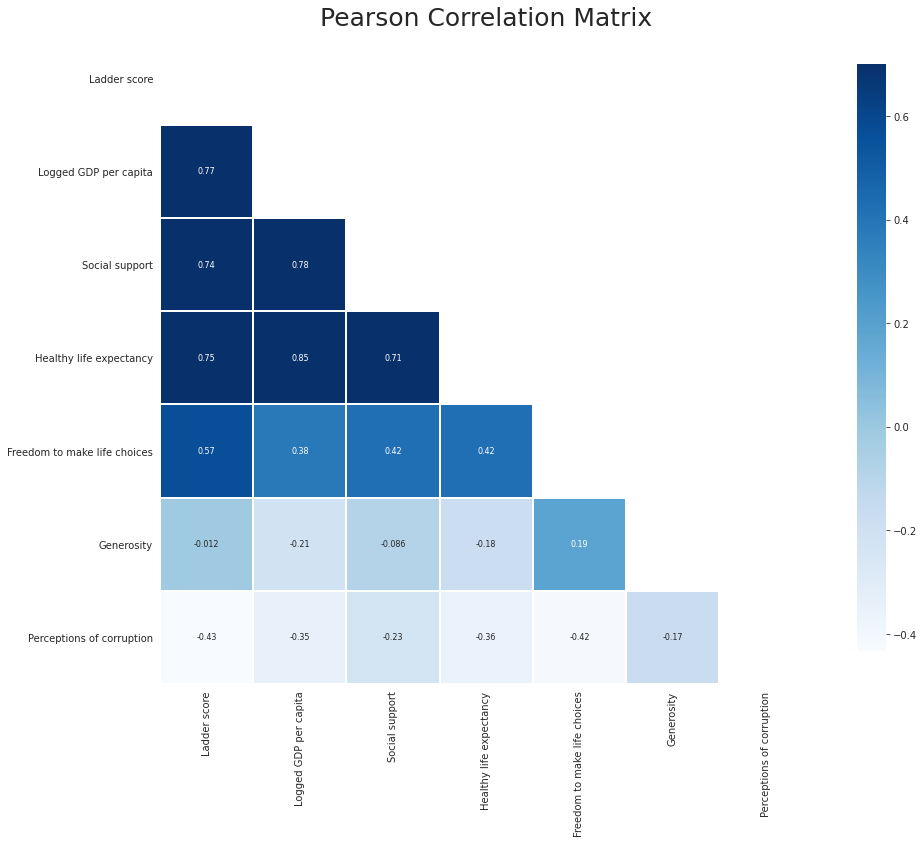

In [33]:
mask = np.zeros_like(df[usecols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
seabornInstance.heatmap(df[usecols].corr(),
                        linewidths=0.25,vmax=0.7,square=True,cmap="Blues", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Seems like GDP, social support and health are strong correlated with ladder score

With just single variable LR as in section 2, it is not good enough a fit. To improve the model, it's time for more complex models

# **4. MODEL BUILDING & EVALUATING**

1. Multiple LR with all features

In [34]:
# XAC DINH 1 HAM DE TINH GIA TRI "ADJUSTED R-SQUARED" 
def adjustedR2(r2, n, k):     
    return r2-((k-1)/(n-k))*(1-r2) # Trong đó k là số parameters và n là số observations.

In [35]:
# MULTIPLE LINEAR REGRESSION 1
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)
independent_var = ['Logged GDP per capita','Healthy life expectancy',
                       'Freedom to make life choices','Social support','Generosity',
                            'Perceptions of corruption']
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[independent_var],train_data_dm['Ladder score'])
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))
print('Happiness score = ',np.round(complex_model_1.intercept_,4),
      '+',np.round(complex_model_1.coef_[0],4),'∗ Social support',
      '+',np.round(complex_model_1.coef_[1],4),'* Logged GDP per capita', 
      '+',np.round(complex_model_1.coef_[2],4),'* Healthy life expectancy',
      '+',np.round(complex_model_1.coef_[3],4),'* Freedom to make life choices',
       '+',np.round(complex_model_1.coef_[4],4),'* Generosity',
      '+',np.round(complex_model_1.coef_[5],4),'* Perceptions of corruption')
pred = complex_model_1.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['Ladder score'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(
                        train_data_dm[independent_var],
                        train_data_dm['Ladder score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(
                           train_data_dm[independent_var],
                            train_data_dm['Ladder score']),
                            train_data_dm.shape[0],
                            len(independent_var)),'.3f'))
rtecm = float(format(complex_model_1.score(
                        test_data_dm[independent_var],
                        test_data_dm['Ladder score']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(
                       test_data_dm[independent_var],test_data['Ladder score']),
                        test_data_dm.shape[0],
                        len(independent_var)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,
                    df[independent_var],
                    df['Ladder score'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression-1','All features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -2.3237054985908614
Coefficients: [ 0.29736831  0.033026    2.23870612  2.05159763  0.52063077 -0.6682094 ]
Happiness score =  -2.3237 + 0.2974 ∗ Social support + 0.033 * Logged GDP per capita + 2.2387 * Healthy life expectancy + 2.0516 * Freedom to make life choices + 0.5206 * Generosity + -0.6682 * Perceptions of corruption


Model                       Details  \
6  Multiple Linear Regression-1                  All features   
0      Simple Linear Regression         Logged GDP per capita   
2      Simple Linear Regression       Healthy life expectancy   
1      Simple Linear Regression                Social support   
3      Simple Linear Regression  Freedom to make life choices   
5      Simple Linear Regression     Perceptions of corruption   
4      Simple Linear Regression                    Generosity   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
6                           0.692                 0.762   
0                           0.752                 0.601   
2                           0.795                 0.579   
1                           0.779                 0.552   
3                           1.091                 0.386   
5                           1.114                 0.219   
4                           1.167                 0.001   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
6                         0.759             0.635                    0.617   
0                             -             0.569                        -   
2                             -             0.518                        -   
1                             -             0.537                        -   
3                             -             0.093                        -   
5                             -             0.055                        -   
4                             -            -0.037                        -   

   5-Fold Cross Validation  
6                    0.668  
0                    0.497  
2                    0.451  
1                    0.429  
3                    0.140  
5                   -0.048  
4                   -0.296

2. Multiple LR with GDP, social support and healthy life expectancy

In [36]:
# MULTIPLE LINEAR REGRESSION 2
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)
independent_var = ['Logged GDP per capita','Healthy life expectancy','Social support']
complex_model_2 = LinearRegression()
complex_model_2.fit(train_data_dm[independent_var],train_data_dm['Ladder score'])
print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))
print('Happiness score = ',np.round(complex_model_2.intercept_,4),
      '+',np.round(complex_model_2.coef_[0],4),'∗ Social support',
      '+',np.round(complex_model_2.coef_[1],4),'* Logged GDP per capita', 
      '+',np.round(complex_model_2.coef_[2],4),'* Healthy life expectancy')
pred = complex_model_2.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['Ladder score'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(
                        train_data_dm[independent_var],
                        train_data_dm['Ladder score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(
                            train_data_dm[independent_var],
                            train_data_dm['Ladder score']),
                            train_data_dm.shape[0],
                            len(independent_var)),'.3f'))
rtecm = float(format(complex_model_2.score(
                        test_data_dm[independent_var],
                        test_data_dm['Ladder score']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(
                        test_data_dm[independent_var],test_data['Ladder score']),
                        test_data_dm.shape[0],
                        len(independent_var)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,
                    df[independent_var],
                    df['Ladder score'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression-2','GDP, Support, Health',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -2.5062347086003793
Coefficients: [0.25861497 0.05030423 2.92034686]
Happiness score =  -2.5062 + 0.2586 ∗ Social support + 0.0503 * Logged GDP per capita + 2.9203 * Healthy life expectancy


Model                       Details  \
6  Multiple Linear Regression-1                  All features   
7  Multiple Linear Regression-2          GDP, Support, Health   
0      Simple Linear Regression         Logged GDP per capita   
2      Simple Linear Regression       Healthy life expectancy   
1      Simple Linear Regression                Social support   
3      Simple Linear Regression  Freedom to make life choices   
5      Simple Linear Regression     Perceptions of corruption   
4      Simple Linear Regression                    Generosity   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
6                           0.692                 0.762   
7                           0.694                 0.680   
0                           0.752                 0.601   
2                           0.795                 0.579   
1                           0.779                 0.552   
3                           1.091                 0.386   
5                           1.114                 0.219   
4                           1.167                 0.001   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
6                         0.759             0.635                    0.617   
7                         0.678             0.633                    0.626   
0                             -             0.569                        -   
2                             -             0.518                        -   
1                             -             0.537                        -   
3                             -             0.093                        -   
5                             -             0.055                        -   
4                             -            -0.037                        -   

   5-Fold Cross Validation  
6                    0.668  
7                    0.582  
0                    0.497  
2                    0.451  
1                    0.429  
3                    0.140  
5                   -0.048  
4                   -0.296

2. Random Forest from sklearn

In [37]:
# RANDOM FOREST
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)
independent_var = ['Logged GDP per capita','Healthy life expectancy',
                       'Freedom to make life choices','Social support','Generosity',
                            'Perceptions of corruption']
complex_model_3 = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=20, min_samples_split=40)
complex_model_3.fit(train_data_dm[independent_var],train_data_dm['Ladder score'])
pred = complex_model_3.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['Ladder score'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(
                        train_data_dm[independent_var],
                        train_data_dm['Ladder score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(
                            train_data_dm[independent_var],
                            train_data_dm['Ladder score']),
                            train_data_dm.shape[0],
                            len(independent_var)),'.3f'))
rtecm = float(format(complex_model_3.score(
                        test_data_dm[independent_var],
                        test_data_dm['Ladder score']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(
                        test_data_dm[independent_var],test_data['Ladder score']),
                        test_data_dm.shape[0],
                        len(independent_var)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,
                    df[independent_var],
                    df['Ladder score'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest','All features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
# n_estimators - Number of trees to build
# max_depth - maximum depth to which tree can grow, if we increase it very much then, model can overfit
# min_samples_leaf - minimum number of samples a leaf can have
# min_samples_split - minimum number of samples a node should have to further split

Model                       Details  \
8                 Random Forest                  All features   
6  Multiple Linear Regression-1                  All features   
7  Multiple Linear Regression-2          GDP, Support, Health   
0      Simple Linear Regression         Logged GDP per capita   
2      Simple Linear Regression       Healthy life expectancy   
1      Simple Linear Regression                Social support   
3      Simple Linear Regression  Freedom to make life choices   
5      Simple Linear Regression     Perceptions of corruption   
4      Simple Linear Regression                    Generosity   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
8                           0.578                 0.819   
6                           0.692                 0.762   
7                           0.694                 0.680   
0                           0.752                 0.601   
2                           0.795                 0.579   
1                           0.779                 0.552   
3                           1.091                 0.386   
5                           1.114                 0.219   
4                           1.167                 0.001   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
8                         0.816             0.745                    0.732   
6                         0.759             0.635                    0.617   
7                         0.678             0.633                    0.626   
0                             -             0.569                        -   
2                             -             0.518                        -   
1                             -             0.537                        -   
3                             -             0.093                        -   
5                             -             0.055                        -   
4                             -            -0.037                        -   

   5-Fold Cross Validation  
8                    0.734  
6                    0.668  
7                    0.582  
0                    0.497  
2                    0.451  
1                    0.429  
3                    0.140  
5                   -0.048  
4                   -0.296

Feature importance

Text(0, 0.5, 'Feature importance')

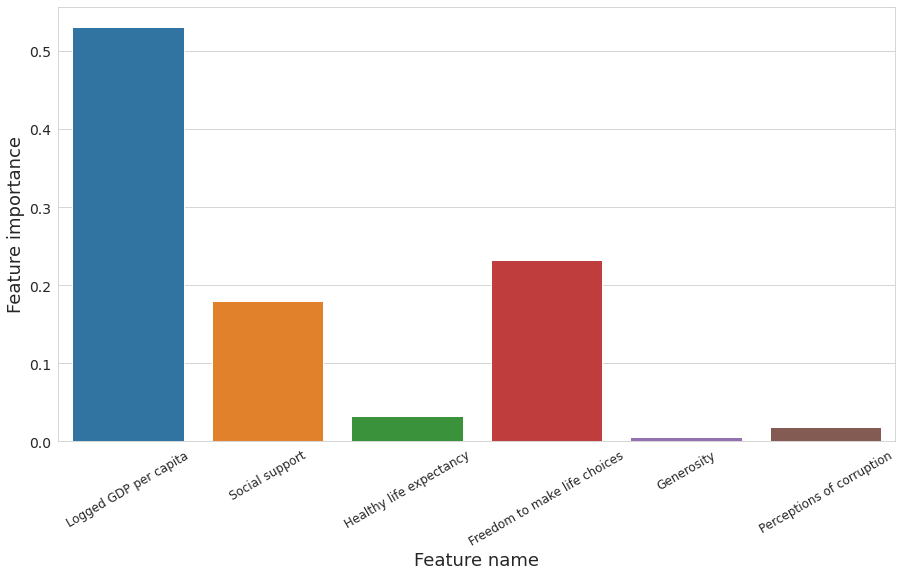

In [38]:
col_to_consider=['Logged GDP per capita', 'Social support',
       'Healthy life expectancy',
       'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption']
# Getting the feature importance
feature_importances_ = complex_model_3.feature_importances_
feature_importances = pd.DataFrame({'Feature_name':col_to_consider, 'Feature_importance':feature_importances_})

fig, ax=plt.subplots(1, figsize=(15,8))
seabornInstance.barplot(x='Feature_name', y='Feature_importance', data = feature_importances, ax=ax)

# For making the graph look good
plt.xticks(fontsize=12, rotation=30); # Rotating the names by 30 degrees as the names were mixing with each other 
plt.yticks(fontsize=14);

plt.xlabel('Feature name',fontsize=18)
plt.ylabel('Feature importance',fontsize=18)

3. Polynomial Regression

In [39]:
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)
independent_var = ['Logged GDP per capita','Healthy life expectancy',
                       'Freedom to make life choices','Social support','Generosity',
                            'Perceptions of corruption']
X = train_data_dm[independent_var]
X = PolynomialFeatures(degree=2).fit_transform(X)
X_test = PolynomialFeatures(degree=2).fit_transform(test_data_dm[independent_var])
complex_model_4 = LinearRegression()
complex_model_4.fit(X,train_data_dm['Ladder score'])
pred = complex_model_4.predict(X_test)
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['Ladder score'],pred)),'.3f'))
rtrcm = float(format(complex_model_4.score(
                        X,
                        train_data_dm['Ladder score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_4.score(
                          X,
                            train_data_dm['Ladder score']),
                            train_data_dm.shape[0],
                            X.shape[1]),'.3f'))
rtecm = float(format(complex_model_4.score(
                        X_test,
                        test_data_dm['Ladder score']),'.3f'))
artecm = float(format(adjustedR2(complex_model_4.score(
                       X_test,test_data['Ladder score']),
                        test_data_dm.shape[0],
                        X_test.shape[1]),'.3f'))
cv = float(format(cross_val_score(complex_model_4,
                    df[independent_var],
                    df['Ladder score'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression-1','All features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                       Details  \
8                 Random Forest                  All features   
6  Multiple Linear Regression-1                  All features   
9       Polynomial Regression-1                  All features   
7  Multiple Linear Regression-2          GDP, Support, Health   
0      Simple Linear Regression         Logged GDP per capita   
2      Simple Linear Regression       Healthy life expectancy   
1      Simple Linear Regression                Social support   
3      Simple Linear Regression  Freedom to make life choices   
5      Simple Linear Regression     Perceptions of corruption   
4      Simple Linear Regression                    Generosity   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
8                           0.578                 0.819   
6                           0.692                 0.762   
9                           0.582                 0.815   
7                           0.694                 0.680   
0                           0.752                 0.601   
2                           0.795                 0.579   
1                           0.779                 0.552   
3                           1.091                 0.386   
5                           1.114                 0.219   
4                           1.167                 0.001   

  Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
8                         0.816             0.745                    0.732   
6                         0.759             0.635                    0.617   
9                         0.802             0.741                    0.652   
7                         0.678             0.633                    0.626   
0                             -             0.569                        -   
2                             -             0.518                        -   
1                             -             0.537                        -   
3                             -             0.093                        -   
5                             -             0.055                        -   
4                             -            -0.037                        -   

   5-Fold Cross Validation  
8                    0.734  
6                    0.668  
9                    0.668  
7                    0.582  
0                    0.497  
2                    0.451  
1                    0.429  
3                    0.140  
5                   -0.048  
4                   -0.296

4. Lasso Regression

In [40]:
# LASSO REGRESSION
train_data_dm, test_data_dm = train_test_split(df, train_size=0.75, random_state=3)
independent_var = ['Logged GDP per capita','Healthy life expectancy','Freedom to make life choices','Social support','Generosity','Perceptions of corruption']

complex_model_L = linear_model.Lasso(alpha=0.0001)
complex_model_L.fit(train_data_dm[independent_var],train_data_dm['Ladder score'])

pred1 = complex_model_L.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(test_data_dm['Ladder score'],pred1)),'.3f'))

rtrcm = float(format(complex_model_L.score(train_data_dm[independent_var], train_data_dm['Ladder score']),'.3f'))

artrcm = float(format(adjustedR2(complex_model_L.score(train_data_dm[independent_var],
                                                             train_data_dm['Ladder score']),train_data_dm.shape[0],
                                                             len(independent_var)),'.3f'))

rtecm = float(format(complex_model_L.score(test_data_dm[independent_var],test_data_dm['Ladder score']),'.3f'))

artecm = float(format(adjustedR2(complex_model_L.score(test_data_dm[independent_var],
                                                             test_data_dm['Ladder score']),
                                                             test_data_dm.shape[0],
                                                             len(independent_var)),'.3f'))

cv1 = float(format(cross_val_score(complex_model_L,df[independent_var],df['Ladder score'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=0.0001, All features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv1]
evaluation.sort_values(by='5-Fold Cross Validation', ascending=False)

Model                       Details  \
8                  Random Forest                  All features   
6   Multiple Linear Regression-1                  All features   
9        Polynomial Regression-1                  All features   
10              Lasso Regression    alpha=0.0001, All features   
7   Multiple Linear Regression-2          GDP, Support, Health   
0       Simple Linear Regression         Logged GDP per capita   
2       Simple Linear Regression       Healthy life expectancy   
1       Simple Linear Regression                Social support   
3       Simple Linear Regression  Freedom to make life choices   
5       Simple Linear Regression     Perceptions of corruption   
4       Simple Linear Regression                    Generosity   

    Root Mean Squared Error (RMSE)  R-squared (training)  \
8                            0.578                 0.819   
6                            0.692                 0.762   
9                            0.582                 0.815   
10                           0.633                 0.754   
7                            0.694                 0.680   
0                            0.752                 0.601   
2                            0.795                 0.579   
1                            0.779                 0.552   
3                            1.091                 0.386   
5                            1.114                 0.219   
4                            1.167                 0.001   

   Adjusted R-squared (training)  R-squared (test) Adjusted R-squared(test)  \
8                          0.816             0.745                    0.732   
6                          0.759             0.635                    0.617   
9                          0.802             0.741                    0.652   
10                         0.751             0.680                    0.667   
7                          0.678             0.633                    0.626   
0                              -             0.569                        -   
2                              -             0.518                        -   
1                              -             0.537                        -   
3                              -             0.093                        -   
5                              -             0.055                        -   
4                              -            -0.037                        -   

    5-Fold Cross Validation  
8                     0.734  
6                     0.668  
9                     0.668  
10                    0.668  
7                     0.582  
0                     0.497  
2                     0.451  
1                     0.429  
3                     0.140  
5                    -0.048  
4                    -0.296